**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.
 
**Why Do We Need Feature Selection?**
 
*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.
*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.

*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.

*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.
 
**Types of Feature Selection Methods**
 
<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 
<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.
 
<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.
 



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
np.random.seed(42)
data=pd.DataFrame({
    'size':np.random.randint(1000,5000,100),
    'bedrooms':np.random.randint(1,5,100),
    'Age':np.random.randint(1,50,100),
    'price':np.random.randint(100000,500000,100)
})

In [4]:
data.head()

,size,bedrooms,Age,price
0,4174,2,32,486393
1,4507,2,39,134754
2,1860,4,49,326814
3,2294,2,32,337714
4,2130,2,4,242483


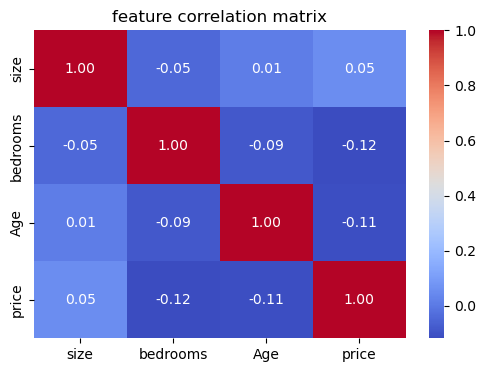

In [5]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True ,cmap='coolwarm',fmt='.2f')
plt.title('feature correlation matrix')
plt.show()

In [7]:
x=data.drop(columns=['price'])
y=data['price']
model=RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)
X=rfe.fit_transform(x,y)
print('selected features:',x.columns[rfe.support_])

selected features: Index(['size', 'Age'], dtype='object')


In [10]:
l=Lasso(alpha=0.1)
l.fit(x,y)
imp=np.abs(l.coef_)
select=x.columns[imp >0]
print('selected featurs ising lasso:',select)

selected featurs ising lasso: Index(['size', 'bedrooms', 'Age'], dtype='object')
